In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns  
import matplotlib.pyplot as plt
from scipy.stats import norm
# might be needed depending on your version of Jupyter
%matplotlib inline

In [3]:
df = pd.read_csv('../Oil & Gas Production/Pandey_Ch07_Production_Engineering_Code/data/Well_Monthly_ProdT.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   START_DATE  528 non-null    object
 1   OIL         528 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.4+ KB


In [5]:
df.isnull().sum()

START_DATE    0
OIL           0
dtype: int64

In [6]:
df.head()

,START_DATE,OIL
0,1974-01-01,7134368
1,1974-01-02,9528303
2,1974-01-03,12263786
3,1974-01-04,13153821
4,1974-01-05,12240857


In [7]:
df

,START_DATE,OIL
0,1974-01-01,7134368
1,1974-01-02,9528303
2,1974-01-03,12263786
3,1974-01-04,13153821
4,1974-01-05,12240857
...,...,...
523,2017-01-08,8450763
524,2017-01-09,8168717
525,2017-01-10,8668929
526,2017-01-11,8452498


In [8]:
df.corr()['OIL'].sort_values()

OIL    1.0
Name: OIL, dtype: float64

In [9]:
#df.corr()['GAS'].sort_values()

In [10]:
#df.corr()['WATER'].sort_values()

In [11]:
df.corr()

,OIL
OIL,1.0


In [12]:
from datetime import datetime
import statsmodels.api as sm

In [13]:
df.set_index('START_DATE',inplace=True)

In [14]:
df

,OIL
START_DATE,
1974-01-01,7134368
1974-01-02,9528303
1974-01-03,12263786
1974-01-04,13153821
1974-01-05,12240857
...,...
2017-01-08,8450763
2017-01-09,8168717
2017-01-10,8668929


In [15]:
#df = df.drop('WATER',axis=1)

In [16]:
#df = df.drop('UWI',axis=1)

In [17]:
#df = df.drop('GAS',axis=1)

In [18]:
df

,OIL
START_DATE,
1974-01-01,7134368
1974-01-02,9528303
1974-01-03,12263786
1974-01-04,13153821
1974-01-05,12240857
...,...
2017-01-08,8450763
2017-01-09,8168717
2017-01-10,8668929


In [19]:
from scipy import stats
import statsmodels.api as sm

In [20]:
#df=df.replace(0, np.nan)

In [21]:
#df=df.replace(0, np.nan).dropna(subset=["OIL"], how="all")

In [22]:
df

,OIL
START_DATE,
1974-01-01,7134368
1974-01-02,9528303
1974-01-03,12263786
1974-01-04,13153821
1974-01-05,12240857
...,...
2017-01-08,8450763
2017-01-09,8168717
2017-01-10,8668929


In [23]:
log_returns=np.log(1+df.pct_change())
log_returns

,OIL
START_DATE,
1974-01-01,NaN
1974-01-02,0.289343
1974-01-03,0.252384
1974-01-04,0.070062
1974-01-05,-0.071933
...,...
2017-01-08,0.008805
2017-01-09,-0.033945
2017-01-10,0.059433


In [24]:
#log_returns=log_returns.replace([np.inf, -np.inf], np.nan)

In [25]:
#df=df.dropna(subset=["OIL"], how="all")

In [26]:
log_returns

,OIL
START_DATE,
1974-01-01,NaN
1974-01-02,0.289343
1974-01-03,0.252384
1974-01-04,0.070062
1974-01-05,-0.071933
...,...
2017-01-08,0.008805
2017-01-09,-0.033945
2017-01-10,0.059433


In [27]:
stdev=np.sqrt(log_returns.std()*365)
stdev

OIL    7.646428
dtype: float64

In [28]:
stdev=stdev.values
stdev

array([7.64642818])

In [29]:
T=1
t_intervals=1000
delta_T=T/t_intervals
iterations=10

In [30]:
Z=np.random.standard_normal((t_intervals+1,iterations))
S=np.zeros_like(Z)
S0=df.iloc[-1]
S[0]=S0

In [31]:
r=0.025

In [32]:
for t in range(1,t_intervals+1):
    S[t]=S[t-1]*np.exp(((r-(0.5*pow(stdev,2)))*delta_T)+(stdev*Z[t]*(np.sqrt(delta_T))))

In [33]:
S

array([[8.60719600e+06, 8.60719600e+06, 8.60719600e+06, ...,
        8.60719600e+06, 8.60719600e+06, 8.60719600e+06],
       [7.54606801e+06, 7.70528793e+06, 8.94491231e+06, ...,
        8.80470512e+06, 7.26653857e+06, 9.84665640e+06],
       [7.88735044e+06, 7.55558918e+06, 8.74296841e+06, ...,
        9.77330723e+06, 6.46522977e+06, 1.36983514e+07],
       ...,
       [2.15289261e-09, 2.66049104e-05, 7.19426937e-09, ...,
        5.64905786e-05, 8.99586747e-02, 3.27102175e-07],
       [1.93310856e-09, 2.03031881e-05, 7.58234444e-09, ...,
        4.85881258e-05, 8.60697709e-02, 4.10554661e-07],
       [2.50836493e-09, 1.71882319e-05, 8.60805637e-09, ...,
        3.16592216e-05, 8.48183752e-02, 3.95367953e-07]])

In [34]:
S.shape

(1001, 10)

(0.0, 50.0)

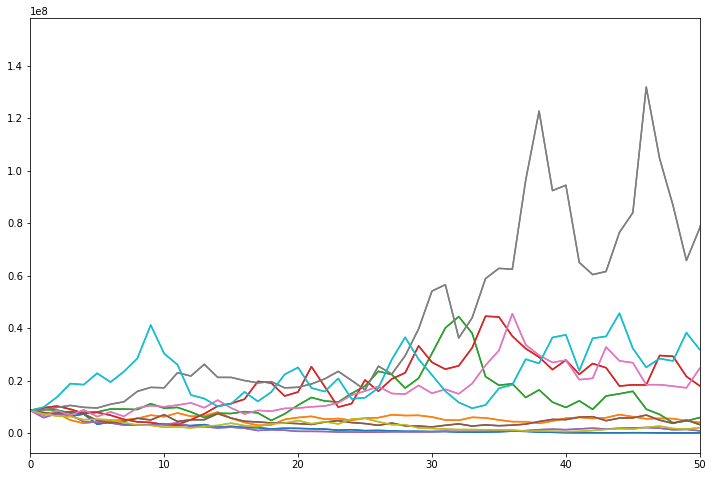

In [36]:
plt.figure(figsize=(12,8));
plt.plot(S[:,:50]);
plt.plot(S);
plt.xlim(left=0,right=50)